In [1]:
#import the modules
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from surprise import Reader, SVD, Dataset
from surprise.model_selection import train_test_split
import Recommenders as Recommenders
import Evaluation as Evaluation
import metrics
import plots

In [2]:
#Load the dataset
data = pd.read_csv('ratings_Electronics.csv',names = ['userId','productId','ratings','timestamp'])

# Explore the data

In [3]:
data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
data.drop(['timestamp'],axis=1,inplace = True)

In [5]:
data.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [6]:
data.shape

(7824482, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [8]:
data.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [9]:
#Check For null values in the dataset
data.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [10]:
data.userId=data.userId.astype(str)
data.productId=data.productId.astype(str)

In [11]:
data.groupby(["ratings"]).count()

,userId,productId
ratings,,
1.0,901765,901765
2.0,456322,456322
3.0,633073,633073
4.0,1485781,1485781
5.0,4347541,4347541


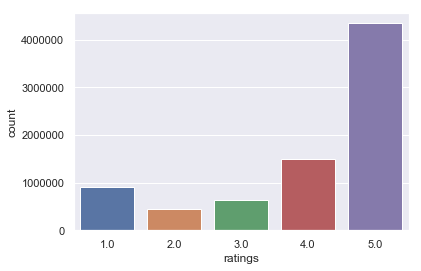

In [12]:
sns.countplot(data['ratings'])

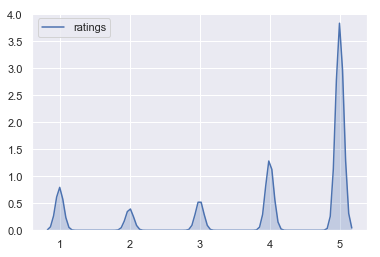

In [13]:
sns.kdeplot(data['ratings'], shade=True, shade_lowest=False)

In [14]:
# the most popular products in the dataset
product_grouped = data.groupby(['productId']).agg({'ratings': 'count'}).reset_index()
grouped_sum = product_grouped['ratings'].sum()
print(grouped_sum)
product_grouped['percentage']  = product_grouped['ratings'].div(grouped_sum)*100
product_grouped.sort_values(['ratings', 'productId'], ascending = [0,1])

7824482


,productId,ratings,percentage
308398,B0074BW614,18244,0.233166
429572,B00DR0PDNE,16454,0.210289
327308,B007WTAJTO,14172,0.181124
102804,B0019EHU8G,12285,0.157007
296625,B006GWO5WK,12226,0.156253
178601,B003ELYQGG,11617,0.148470
178813,B003ES5ZUU,10276,0.131331
323013,B007R5YDYA,9907,0.126615
289775,B00622AG6S,9823,0.125542
30276,B0002L5R78,9487,0.121248


In [15]:
# Count number of unique users in the dataset
users = data['userId'].unique()
len(users)

4201696

In [16]:
# Count the number of unique products in the dataset
products = data['productId'].unique()
len(products)

476002

In [17]:
# Users with max no of products rated
data["userId"].value_counts().head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userId, dtype: int64

# subset of the dataset

In [18]:
# Create a subset of the dataset
# keep the users only who has given 50 or more number of ratings
user_grouped = data.groupby('userId').agg({'ratings': 'count'})
index_users_rated_above_50 = user_grouped[user_grouped.ratings >= 50].index
sub_set = data[data['userId'].isin(index_users_rated_above_50)]

In [19]:
sub_set

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1003,A2Y4H3PXB07WQI,0972683275,4.0
1138,A25RTRAPQAJBDJ,0972683275,5.0
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0


# Long Tail Plot 

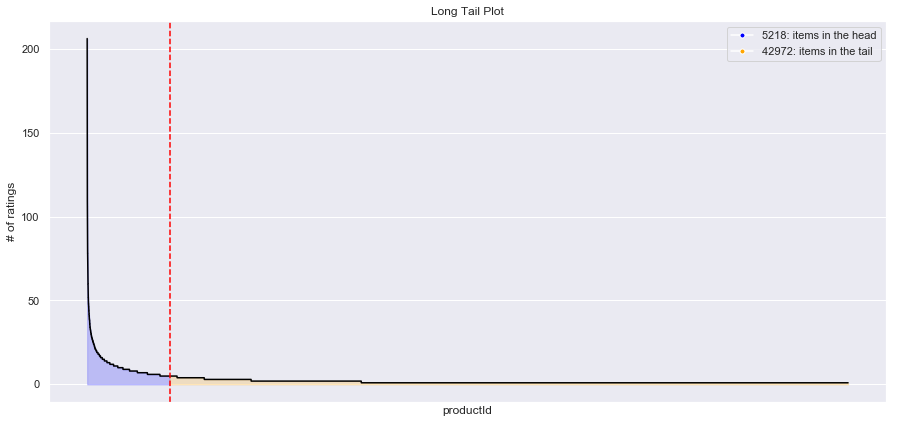

In [20]:
fig = plt.figure(figsize=(15, 7))
plots.long_tail_plot(df=sub_set, 
             item_id_column="productId", 
             interaction_type="ratings", 
             percentage=0.5,
             x_labels=False)

# Collaborative Filter Recommender

Creating a simple CF to demonstrate recommender metrics in action using a SVD approach in the surprise package. The surprise package also takes care of the test train split. The collaborative filter transforms user-item interactions into latent space, and reconstructs the user-item matrix to impute ratings missing product ratings. The predicted rating is the dot product between the user and product vectors in latent space.

In [21]:
#format data for surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(sub_set[['userId', 'productId', 'ratings']], reader)
trainset, testset = train_test_split(data, test_size=0.30)

In [22]:
#train SVD recommender 
algo = SVD()
algo.fit(trainset)

In [23]:
#make predictions on test set. 
test = algo.test(testset)
test = pd.DataFrame(test)
test.drop("details", inplace=True, axis=1)
test.columns = ['userId', 'productId', 'actual', 'cf_predictions']
test.head()

,userId,productId,actual,cf_predictions
0,A2RW587355CMVA,B00829TIEK,4.0,4.560612
1,A1V3TRGWOMA8LC,B001AI4HSC,5.0,4.264190
2,A1H4IVXNXWWBLV,B000VRXONM,4.0,4.178046
3,AV8MDYLHHTUOY,B00BW0XDU6,5.0,4.215434
4,AW6FQE5QRF2LM,B00FNPD1OY,5.0,4.857976


In [24]:
#evaluate model with MSE and RMSE
print(metrics.mse(test.actual, test.cf_predictions))
print(metrics.rmse(test.actual, test.cf_predictions))

0.969583919716768
0.9846745247627604


In [25]:
#create model (matrix of predicted values)
cf_model = test.pivot_table(index='userId', columns='productId', values='cf_predictions').fillna(0)

In [26]:
def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [27]:
#get example prediction
get_users_predictions('A3A4ZAIBQWKOZS', 5, cf_model)

['B003ES5ZUU', 'B007BXD66E', 'B007WTAJTO', 'B00ENZRS76', 'B0012Y6HC8']

In [28]:
#format test data
test = test.copy().groupby('userId')['productId'].agg({'actual': (lambda x: list(set(x)))})
#make recommendations for all members in the test data
recs = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 5, cf_model)
    recs.append(cf_predictions)
        
test['cf_predictions'] = recs
test.head()

c:\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,actual,cf_predictions
userId,,
A100UD67AHFODS,"[B008HO9DIG, B0045EPIG8, B008U3FQL2, B004YLCFC...","[B0082E9K7U, B00F0DD0I6, B008HO9DIG, B0045EPIG..."
A100WO06OQR8BQ,"[B004CLYEH8, B0089VKNHM, B00186URQC, B004CLYE8...","[B0002LEMWE, B001AW8W7A, B004CLYE8C, B000HPV3R..."
A105S56ODHGJEK,"[B00CL8F98W, B001O5CCQK, B007ZW7YEQ, B006C248B...","[B000QWEN5K, B009NHWVIA, B00829TIA4, B00829TIE..."
A105TOJ6LTVMBG,"[B001VBU0NY, B000TXK9KE, B000065BP9, B004S4R5C...","[B006JINHYS, B004U1Y3IU, B00000J1V5, B004S4R5C..."
A10AFVU66A79Y1,"[B00IVPU59W, B005DOUJL8, B001PKTR76, B003B48UQ...","[B00IVPU59W, B002V88HFE, B00JEVHZHC, B00CT0BWH..."


# Popularity Recommender

Creating a simple popularity recommender to demonstrate recommender metrics in action.
The popularity recommender simply recommends the top 10 products to every user.

In [29]:
#make recommendations for all members in the test data
popularity_recs = sub_set.productId.value_counts().head(5).index.tolist()

recs = []
for user in test.index:
    pop_predictions = popularity_recs
    recs.append(pop_predictions)
        
test['pop_predictions'] = recs
test.head()

,actual,cf_predictions,pop_predictions
userId,,,
A100UD67AHFODS,"[B008HO9DIG, B0045EPIG8, B008U3FQL2, B004YLCFC...","[B0082E9K7U, B00F0DD0I6, B008HO9DIG, B0045EPIG...","[B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJT..."
A100WO06OQR8BQ,"[B004CLYEH8, B0089VKNHM, B00186URQC, B004CLYE8...","[B0002LEMWE, B001AW8W7A, B004CLYE8C, B000HPV3R...","[B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJT..."
A105S56ODHGJEK,"[B00CL8F98W, B001O5CCQK, B007ZW7YEQ, B006C248B...","[B000QWEN5K, B009NHWVIA, B00829TIA4, B00829TIE...","[B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJT..."
A105TOJ6LTVMBG,"[B001VBU0NY, B000TXK9KE, B000065BP9, B004S4R5C...","[B006JINHYS, B004U1Y3IU, B00000J1V5, B004S4R5C...","[B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJT..."
A10AFVU66A79Y1,"[B00IVPU59W, B005DOUJL8, B001PKTR76, B003B48UQ...","[B00IVPU59W, B002V88HFE, B00JEVHZHC, B00CT0BWH...","[B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJT..."


# Recall

In [30]:
actual = test.actual.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()

In [31]:
pop_mark = []
for K in np.arange(1, 6):
    pop_mark.extend([metrics.mark(actual, pop_predictions, k=K)])
pop_mark

[0.0014012477968999902,
 0.002261426001730512,
 0.002709217718160094,
 0.0030929164429032018,
 0.003377427714112195]

In [32]:
cf_mark = []
for K in np.arange(1, 6):
    cf_mark.extend([metrics.mark(actual, cf_predictions, k=K)])
cf_mark

[0.049578416306003285,
 0.09915683261200657,
 0.14873524891800988,
 0.19831366522401314,
 0.24789208153001643]

# Mark Plot

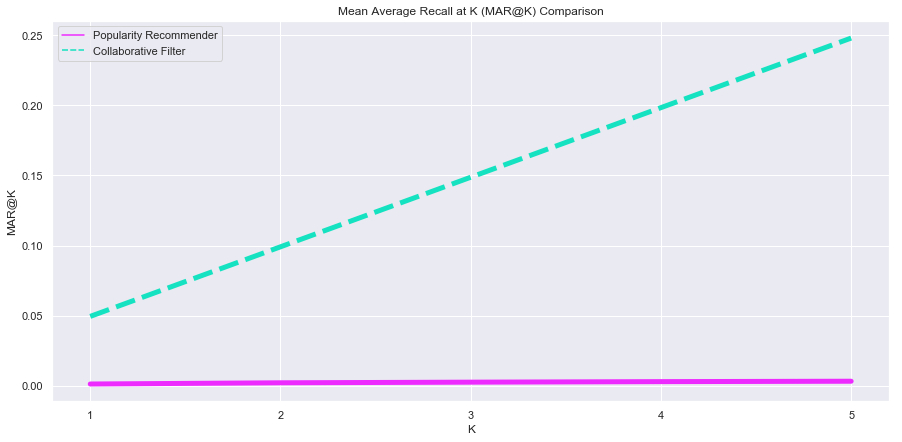

In [33]:
mark_scores = [pop_mark, cf_mark]
index = range(1,5+1)
names = ['Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(15, 7))
plots.mark_plot(mark_scores, model_names=names, k_range=index)

# Coverage

In [34]:
catalog = sub_set.productId.unique().tolist()
pop_coverage = metrics.coverage(pop_predictions, catalog)
cf_coverage = metrics.coverage(cf_predictions, catalog)

# Coverage Plot

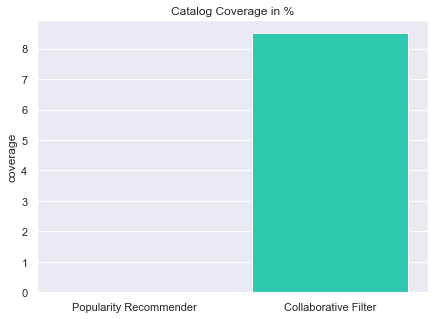

In [35]:
coverage_scores = [pop_coverage, cf_coverage]
model_names = ['Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(7, 5))
plots.coverage_plot(coverage_scores, model_names)